In [27]:
import pandas as pd
import geopandas as gpd

In [98]:
busi = pd.read_csv('Datasets/busi_train.csv')
econ = pd.read_csv('Datasets/econ_train.csv')
educ = pd.read_csv('Datasets/educ_train.csv')
envi = pd.read_csv('Datasets/envi_train.csv')
gove = pd.read_csv('Datasets/gove_train.csv')
heal = pd.read_csv('Datasets/heal_train.csv')
pers = pd.read_csv('Datasets/pers_train.csv')
safe = pd.read_csv('Datasets/safe_train.csv')
soci = pd.read_csv('Datasets/soci_train.csv')

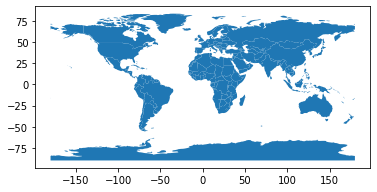

In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot();

In [57]:
# world_busi_2007 = world.merge(busi_2007[['isocode', 'busi']], left_on='iso_a3', right_on='isocode')
# world_busi_2007.plot(column='busi', legend=True);

In [74]:
# prosperity_data = pd.DataFrame(columns=[''])

In [133]:
prosperity_data = pd.DataFrame()
fpath = 'Datasets/'
for file in sorted(os.listdir(fpath)):
    if file.startswith('.') or 'test' in file: continue
    print(fpath+file)
    data = pd.read_csv(fpath+file)
    pillar = file.split('/')[-1][:4]
    if len(prosperity_data) == 0:
        prosperity_data = data[['country', 'isonum', 'isocode', 'year', pillar]]
        continue
    prosperity_data = prosperity_data.merge(data[['country', 'year', pillar]], on=['country', 'year'], how='left')

<IPython.core.display.Javascript object>

Datasets/busi_train.csv
Datasets/econ_train.csv
Datasets/educ_train.csv
Datasets/envi_train.csv
Datasets/gove_train.csv
Datasets/heal_train.csv
Datasets/pers_train.csv
Datasets/safe_train.csv
Datasets/soci_train.csv


In [134]:
prosperity_data['prosperity'] = prosperity_data.apply(lambda x: x[x.columns[4:]].mean())

AttributeError: 'Series' object has no attribute 'columns'

In [67]:
busi

,Unnamed: 0,country,isonum,isocode,year,rank_busi,busi,start,start_year,ahead,...,ippr,ippr_year,insdtf,insdtf_year,creddtf,creddtf_year,elcostlnl,elcostlnl_year,stardtf,stardtf_year
0,0,Afghanistan,4,AFG,2007,127,35.308167,***,2011,***,...,2.457773,--,27.07,2007,6.25,2007,6.426812,2009,82.87,2007
1,1,Angola,24,AGO,2007,146,27.057371,***,2011,***,...,2.354330,2011,0.00,2007,18.75,2007,7.002247,2009,34.94,2007
2,2,Albania,8,ALB,2007,107,40.626377,***,2012,***,...,2.201990,2007,39.59,2007,56.25,2007,6.420809,2009,68.21,2007
3,3,United Arab Emirates,784,ARE,2007,42,52.791740,***,2011,***,...,4.843728,2007,28.76,2007,25.00,2007,2.850707,2009,71.61,2007
4,4,Argentina,32,ARG,2007,68,47.438419,***,2011,***,...,2.831459,2007,37.02,2007,62.50,2007,3.822098,2009,72.77,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1187,Vietnam,704,VNM,2014,82,50.571323,***,2014,***,...,3.050503,2014,35.02,2014,65.00,2014,7.267386,2014,77.68,2014
1188,1188,Yemen,887,YEM,2014,146,34.814461,***,2014,***,...,2.314462,2014,27.46,2014,0.00,2014,8.158401,2014,74.43,2014
1189,1189,South Africa,710,ZAF,2014,35,59.192585,***,2014,***,...,5.300020,2014,64.51,2014,60.00,2014,6.592360,2014,81.18,2014
1190,1190,Zambia,894,ZMB,2014,57,54.895561,***,2014,***,...,4.024301,2014,39.88,2014,70.00,2014,6.730421,2014,86.91,2014


In [23]:
educ.columns

Index(['Unnamed: 0', 'country', 'isonum', 'isocode', 'year', 'rank_educ',
       'educ', 'qslnl', 'qslnl_year', 'edsys', 'edsys_year', 'kids',
       'kids_year', 'secvocp', 'secvocp_year', 'teryrs', 'teryrs_year',
       'edqualsc', 'edqualsc_year', 'gbrata', 'gbrata_year', 'secyrs',
       'secyrs_year', 'Ginih15', 'Ginih15_year', 'prcompc', 'prcompc_year',
       'lityf', 'lityf_year', 'litaf', 'litaf_year'],
      dtype='object')

In [25]:
envi

,Unnamed: 0,country,isonum,isocode,year,rank_envi,envi,fwateruse,fwateruse_year,preserve,...,fishstock,fishstock_year,marineprotect,marineprotect_year,improved_drinkwater,improved_drinkwater_year,pestreg,pestreg_year,terrestprotect,terrestprotect_year
0,0,Afghanistan,4,AFG,2007,146,39.293343,43.011665,2013,***,...,35.323078,--,13.537368,--,42.6,2007,0,2007,0.366882,2007
1,1,Angola,24,AGO,2007,137,47.982162,0.476892,2007,***,...,4.500000,2007,0.066623,2007,46.4,2007,3,2007,12.399823,2007
2,2,Albania,8,ALB,2007,119,51.049442,4.873606,2007,***,...,37.099178,--,1.624084,2007,95.9,2007,5,2007,9.804400,2007
3,3,United Arab Emirates,784,ARE,2007,50,62.051479,100.000000,2007,***,...,30.838837,--,2.571971,2007,99.6,2007,23,2007,5.616998,2007
4,4,Argentina,32,ARG,2007,33,64.909729,12.938356,2012,***,...,12.280000,2007,1.103726,2007,97.7,2007,23,2007,5.466403,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1187,Vietnam,704,VNM,2014,71,61.893570,22.824151,2013,***,...,0.450000,2010,1.730224,2012,96.4,2014,22,2012,6.454478,2012
1188,1188,Yemen,887,YEM,2014,146,42.590019,100.000000,2013,***,...,11.190000,2010,3.301255,2012,54.9,2012,21,2012,0.790254,2012
1189,1189,South Africa,710,ZAF,2014,46,65.979095,27.901786,2013,***,...,20.931701,2010,12.757203,2012,92.8,2014,22,2012,6.199420,2012
1190,1190,Zambia,894,ZMB,2014,88,59.992748,1.960100,2013,***,...,35.323078,--,13.537368,--,64.6,2014,18,2012,37.776195,2012


In [24]:
envi.columns

Index(['Unnamed: 0', 'country', 'isonum', 'isocode', 'year', 'rank_envi',
       'envi', 'fwateruse', 'fwateruse_year', 'preserve', 'preserve_year',
       'airpollution', 'airpollution_year', 'wasterwater', 'wasterwater_year',
       'fishstock', 'fishstock_year', 'marineprotect', 'marineprotect_year',
       'improved_drinkwater', 'improved_drinkwater_year', 'pestreg',
       'pestreg_year', 'terrestprotect', 'terrestprotect_year'],
      dtype='object')

In [19]:
# Compute Wellness Scores
busi['country']

0                Afghanistan
1                     Angola
2                    Albania
3       United Arab Emirates
4                  Argentina
                ...         
1187                 Vietnam
1188                   Yemen
1189            South Africa
1190                  Zambia
1191                Zimbabwe
Name: country, Length: 1192, dtype: object

In [20]:
educ['country']

0                Afghanistan
1                     Angola
2                    Albania
3       United Arab Emirates
4                  Argentina
                ...         
1187                 Vietnam
1188                   Yemen
1189            South Africa
1190                  Zambia
1191                Zimbabwe
Name: country, Length: 1192, dtype: object

In [7]:
busi['busi']

0       35.308167
1       27.057371
2       40.626377
3       52.791740
4       47.438419
          ...    
1187    50.571323
1188    34.814461
1189    59.192585
1190    54.895561
1191    38.271263
Name: busi, Length: 1192, dtype: float64

In [9]:
educ['educ']

0       22.494400
1       35.916668
2       56.318413
3       59.942955
4       51.995552
          ...    
1187    61.757511
1188    27.087793
1189    57.209820
1190    41.685936
1191    49.465069
Name: educ, Length: 1192, dtype: float64

In [10]:
environment['envi']

0       39.293343
1       47.982162
2       51.049442
3       62.051479
4       64.909729
          ...    
1187    61.893570
1188    42.590019
1189    65.979095
1190    59.992748
1191    53.043980
Name: envi, Length: 1192, dtype: float64